### Workshop - Decision Trees

This workshop deals with understanding the working of decision trees.

### Author: Xaltius Pte. Ltd.
Copyright Xaltius Pte. Ltd., 2018

**Not for distribution.**

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn.datasets as datasets
iris=datasets.load_iris()

df=pd.DataFrame(iris.data, columns=iris.feature_names)
df['Species']=iris.target
df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [64]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


### Now let us define the Decision Tree Algorithm

C:\Users\Acer\ana\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Acer\ana\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


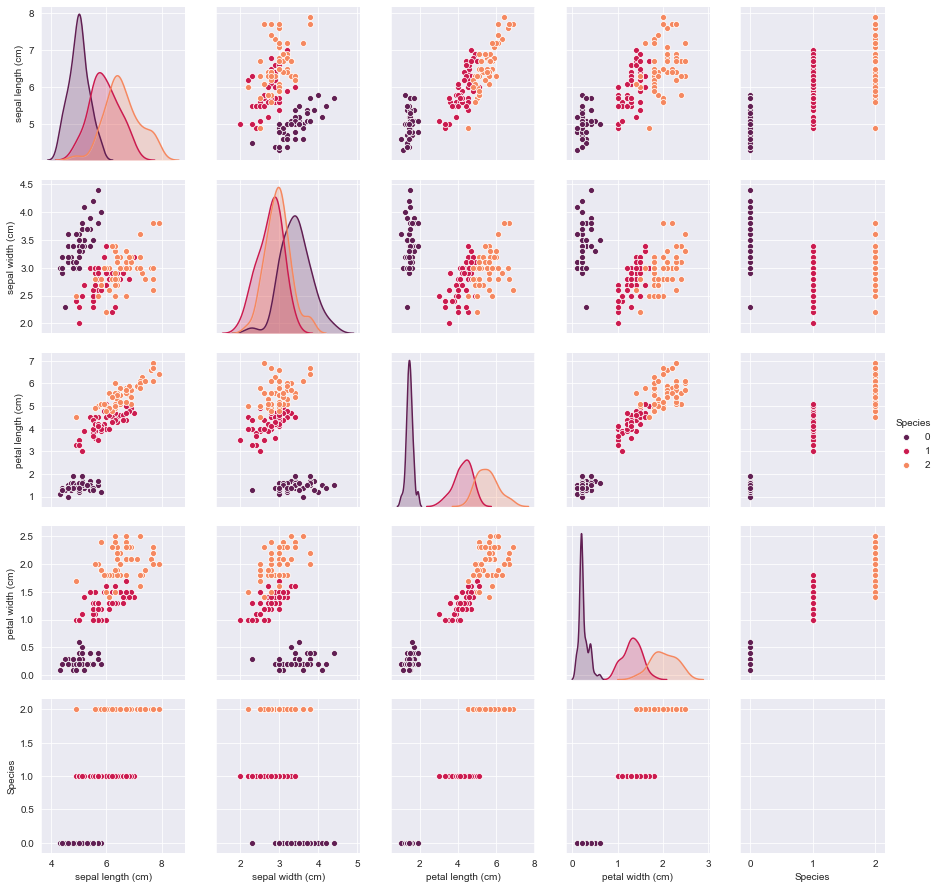

In [45]:
sns.set_style('darkgrid')
sns.pairplot(df,hue='Species',palette='rocket')

### Let us visualize the Decision Tree to understand it better.



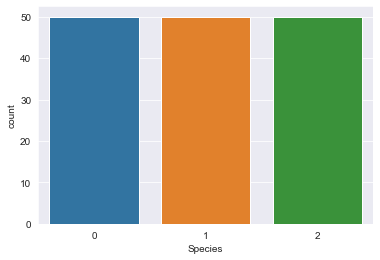

In [46]:
sns.countplot(x='Species',data=df)

In [66]:
from sklearn.model_selection import train_test_split
X=df.drop('Species',axis=1)
y=df['Species']
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.3)

In [67]:
X_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
104,6.5,3.0,5.8,2.2
136,6.3,3.4,5.6,2.4
45,4.8,3.0,1.4,0.3
108,6.7,2.5,5.8,1.8
63,6.1,2.9,4.7,1.4


In [68]:
X_train.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,105.000000,105.000000,105.000000,105.000000
mean,5.826667,3.077143,3.680952,1.161905
std,0.878292,0.433292,1.869600,0.786225
min,4.300000,2.200000,1.000000,0.100000
25%,5.000000,2.800000,1.500000,0.200000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [69]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)
prediction=dtc.predict(X_test)

In [70]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,prediction))
print('\n')
print(classification_report(y_test,prediction))

[[11  0  0]
 [ 0 19  0]
 [ 0  1 14]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.95      1.00      0.97        19
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [76]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test,rfc_pred))
print('\n')
print(classification_report(y_test,rfc_pred))

[[11  0  0]
 [ 0 19  0]
 [ 0  1 14]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.95      1.00      0.97        19
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



**You can now feed any new/test data to this classifer and it would be able to predict the right class accordingly.**